In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
import plotly
import cufflinks as cf
cf.go_offline()

In [3]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2023, 7, 31)

In [4]:
# APPLE
AAPL = web.DataReader('AAPL', 'stooq', start, end)

# tesla
TSLA = web.DataReader('TSLA', 'stooq', start, end)

# NVIDIA
NVDA = web.DataReader('NVDA', 'stooq', start, end)

# META
META = web.DataReader('META', 'stooq', start, end)

# MICROSOFT
MSFT = web.DataReader('MSFT', 'stooq', start, end)

# GOOGLE
GOOGL = web.DataReader('GOOGL', 'stooq', start, end)


df = web.DataReader(['AAPL', 'TSLA', 'NVDA', 'META', 'MSFT', 'GOOGL'],'stooq', start, end)

In [5]:
df.head()

Attributes    Close                                          High       \
Symbols        AAPL TSLA     NVDA META     MSFT    GOOGL     AAPL TSLA   
Date                                                                     
2010-01-04  6.51522  NaN  4.24205  NaN  24.3178  15.6690  6.53008  NaN   
2010-01-05  6.52639  NaN  4.30471  NaN  24.3267  15.6000  6.56358  NaN   
2010-01-06  6.42221  NaN  4.33268  NaN  24.1758  15.2065  6.55241  NaN   
2010-01-07  6.41085  NaN  4.24665  NaN  23.9257  14.8525  6.45421  NaN   
2010-01-08  6.45401  NaN  4.25595  NaN  24.0934  15.0505  6.45421  NaN   

Attributes                ...     Open                               Volume  \
Symbols        NVDA META  ...     NVDA META     MSFT    GOOGL          AAPL   
Date                      ...                                                 
2010-01-04  4.27224  NaN  ...  4.24665  NaN  24.0854  15.6740  5.764890e+08   
2010-01-05  4.35048  NaN  ...  4.24435  NaN  24.2542  15.6795  7.055130e+08   
2010-01-06  4.34118  NaN  ...  4.28622  NaN  24.2642  15.6465  6.452991e+08   
2010-01-07  4.32818  NaN  ...  4.30921  NaN  24.0537  15.2350  5.588893e+08   
2010-01-08  4.28622  NaN  ...  4.22787  NaN  23.7837  14.8000  5.246856e+08   

Attributes                                                     
Symbols    TSLA          NVDA META          MSFT        GOOGL  
Date                                                           
2010-01-04  NaN  8.715685e+07  NaN  4.886916e+07   78248000.0  
2010-01-05  NaN  7.938915e+07  NaN  6.331174e+07  120188000.0  
2010-01-06  NaN  7.023884e+07  NaN  7.403254e+07  159148000.0  
2010-01-07  NaN  5.968573e+07  NaN  6.434577e+07  256572000.0  
2010-01-08  NaN  5.209951e+07  NaN  6.515561e+07  188972000.0  

[5 rows x 30 columns]

In [6]:
df = df.swaplevel(axis=1).sort_index(axis=1)
df.head()

Symbols        AAPL                                             GOOGL  \
Attributes    Close     High      Low     Open        Volume    Close   
Date                                                                    
2010-01-04  6.51522  6.53008  6.46597  6.49958  5.764890e+08  15.6690   
2010-01-05  6.52639  6.56358  6.49230  6.53905  7.055130e+08  15.6000   
2010-01-06  6.42221  6.55241  6.41553  6.52639  6.452991e+08  15.2065   
2010-01-07  6.41085  6.45421  6.36409  6.44444  5.588893e+08  14.8525   
2010-01-08  6.45401  6.45421  6.36458  6.40586  5.246856e+08  15.0505   

Symbols                                             ...     NVDA           \
Attributes     High      Low     Open       Volume  ...    Close     High   
Date                                                ...                     
2010-01-04  15.7380  15.6060  15.6740   78248000.0  ...  4.24205  4.27224   
2010-01-05  15.6960  15.5385  15.6795  120188000.0  ...  4.30471  4.35048   
2010-01-06  15.6465  15.1590  15.6465  159148000.0  ...  4.33268  4.34118   
2010-01-07  15.2500  14.8160  15.2350  256572000.0  ...  4.24665  4.32818   
2010-01-08  15.0810  14.7280  14.8000  188972000.0  ...  4.25595  4.28622   

Symbols                                     TSLA                       
Attributes      Low     Open        Volume Close High Low Open Volume  
Date                                                                   
2010-01-04  4.15512  4.24665  8.715685e+07   NaN  NaN NaN  NaN    NaN  
2010-01-05  4.22587  4.24435  7.938915e+07   NaN  NaN NaN  NaN    NaN  
2010-01-06  4.26074  4.28622  7.023884e+07   NaN  NaN NaN  NaN    NaN  
2010-01-07  4.21438  4.30921  5.968573e+07   NaN  NaN NaN  NaN    NaN  
2010-01-08  4.18770  4.22787  5.209951e+07   NaN  NaN NaN  NaN    NaN  

[5 rows x 30 columns]

In [7]:
df.keys()

MultiIndex([( 'AAPL',  'Close'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',   'Open'),
            ( 'AAPL', 'Volume'),
            ('GOOGL',  'Close'),
            ('GOOGL',   'High'),
            ('GOOGL',    'Low'),
            ('GOOGL',   'Open'),
            ('GOOGL', 'Volume'),
            ( 'META',  'Close'),
            ( 'META',   'High'),
            ( 'META',    'Low'),
            ( 'META',   'Open'),
            ( 'META', 'Volume'),
            ( 'MSFT',  'Close'),
            ( 'MSFT',   'High'),
            ( 'MSFT',    'Low'),
            ( 'MSFT',   'Open'),
            ( 'MSFT', 'Volume'),
            ( 'NVDA',  'Close'),
            ( 'NVDA',   'High'),
            ( 'NVDA',    'Low'),
            ( 'NVDA',   'Open'),
            ( 'NVDA', 'Volume'),
            ( 'TSLA',  'Close'),
            ( 'TSLA',   'High'),
            ( 'TSLA',    'Low'),
            ( 'TSLA',   'Open'),
            ( 'TSLA', 'Volume')],
         

In [8]:
tickers = ['AAPL', 'TSLA', 'NVDA', 'META', 'MSFT', 'GOOGL']
tech_stocks = pd.concat([AAPL, TSLA, NVDA, META, MSFT, GOOGL],axis=1,keys=tickers)
tech_stocks.columns.names = ['Bank Ticker','Stock Info']
tech_stocks.head()

Bank Ticker     AAPL                                          TSLA           \
Stock Info      Open     High      Low    Close        Volume Open High Low   
Date                                                                          
2010-01-04   6.49958  6.53008  6.46597  6.51522  5.764890e+08  NaN  NaN NaN   
2010-01-05   6.53905  6.56358  6.49230  6.52639  7.055130e+08  NaN  NaN NaN   
2010-01-06   6.52639  6.55241  6.41553  6.42221  6.452991e+08  NaN  NaN NaN   
2010-01-07   6.44444  6.45421  6.36409  6.41085  5.588893e+08  NaN  NaN NaN   
2010-01-08   6.40586  6.45421  6.36458  6.45401  5.246856e+08  NaN  NaN NaN   

Bank Ticker               ...     MSFT                             \
Stock Info  Close Volume  ...     Open     High      Low    Close   
Date                      ...                                       
2010-01-04    NaN    NaN  ...  24.0854  24.4389  24.0358  24.3178   
2010-01-05    NaN    NaN  ...  24.2542  24.4389  24.0765  24.3267   
2010-01-06    NaN    NaN  ...  24.2642  24.4230  23.9852  24.1758   
2010-01-07    NaN    NaN  ...  24.0537  24.1232  23.7221  23.9257   
2010-01-08    NaN    NaN  ...  23.7837  24.2642  23.7608  24.0934   

Bank Ticker                  GOOGL                                          
Stock Info         Volume     Open     High      Low    Close       Volume  
Date                                                                        
2010-01-04   4.886916e+07  15.6740  15.7380  15.6060  15.6690   78248000.0  
2010-01-05   6.331174e+07  15.6795  15.6960  15.5385  15.6000  120188000.0  
2010-01-06   7.403254e+07  15.6465  15.6465  15.1590  15.2065  159148000.0  
2010-01-07   6.434577e+07  15.2350  15.2500  14.8160  14.8525  256572000.0  
2010-01-08   6.515561e+07  14.8000  15.0810  14.7280  15.0505  188972000.0  

[5 rows x 30 columns]

In [9]:
tech_stocks.drop(('TSLA'), axis = 1, inplace = True)
tech_stocks.drop(('META'), axis = 1, inplace = True)
tech_stocks.head()

Bank Ticker     AAPL                                              NVDA  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2010-01-04   6.49958  6.53008  6.46597  6.51522  5.764890e+08  4.24665   
2010-01-05   6.53905  6.56358  6.49230  6.52639  7.055130e+08  4.24435   
2010-01-06   6.52639  6.55241  6.41553  6.42221  6.452991e+08  4.28622   
2010-01-07   6.44444  6.45421  6.36409  6.41085  5.588893e+08  4.30921   
2010-01-08   6.40586  6.45421  6.36458  6.45401  5.246856e+08  4.22787   

Bank Ticker                                              MSFT           \
Stock Info      High      Low    Close        Volume     Open     High   
Date                                                                     
2010-01-04   4.27224  4.15512  4.24205  8.715685e+07  24.0854  24.4389   
2010-01-05   4.35048  4.22587  4.30471  7.938915e+07  24.2542  24.4389   
2010-01-06   4.34118  4.26074  4.33268  7.023884e+07  24.2642  24.4230   
2010-01-07   4.32818  4.21438  4.24665  5.968573e+07  24.0537  24.1232   
2010-01-08   4.28622  4.18770  4.25595  5.209951e+07  23.7837  24.2642   

Bank Ticker                                    GOOGL                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2010-01-04   24.0358  24.3178  4.886916e+07  15.6740  15.7380  15.6060   
2010-01-05   24.0765  24.3267  6.331174e+07  15.6795  15.6960  15.5385   
2010-01-06   23.9852  24.1758  7.403254e+07  15.6465  15.6465  15.1590   
2010-01-07   23.7221  23.9257  6.434577e+07  15.2350  15.2500  14.8160   
2010-01-08   23.7608  24.0934  6.515561e+07  14.8000  15.0810  14.7280   

Bank Ticker                        
Stock Info     Close       Volume  
Date                               
2010-01-04   15.6690   78248000.0  
2010-01-05   15.6000  120188000.0  
2010-01-06   15.2065  159148000.0  
2010-01-07   14.8525  256572000.0  
2010-01-08   15.0505  188972000.0

In [10]:
tickers = ['AAPL','NVDA', 'MSFT', 'GOOGL']
tech_stocks.xs(key='Close', axis = 1, level ='Stock Info').max()
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.head()

,AAPL Return,NVDA Return,MSFT Return,GOOGL Return
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001714,0.014771,0.000366,-0.004404
2010-01-06,-0.015963,0.006498,-0.006203,-0.025224
2010-01-07,-0.001769,-0.019856,-0.010345,-0.023280
2010-01-08,0.006732,0.002190,0.007009,0.013331


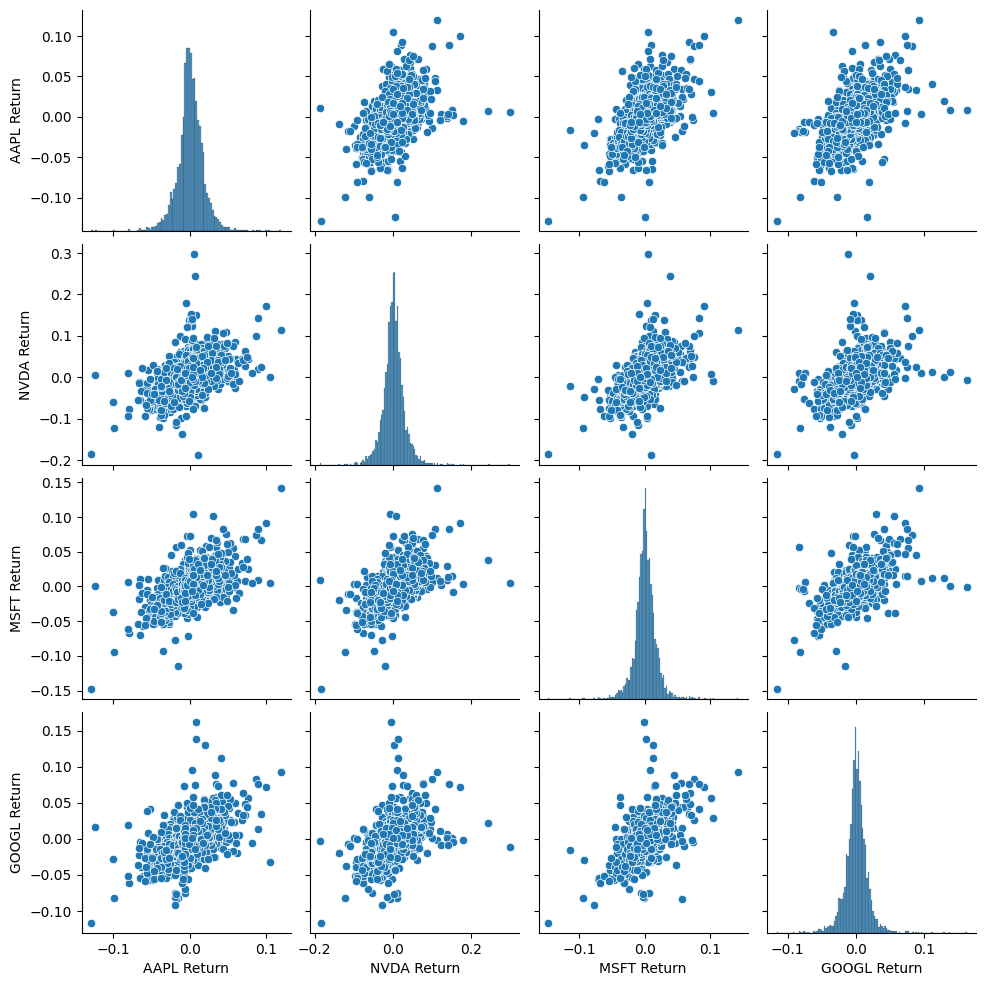

In [11]:
sns.pairplot(returns[1:])

In [12]:
returns.idxmin()

AAPL Return    2020-03-16
NVDA Return    2018-11-16
MSFT Return    2020-03-16
GOOGL Return   2020-03-16
dtype: datetime64[ns]

In [13]:
returns.idxmax()

AAPL Return    2020-03-13
NVDA Return    2016-11-11
MSFT Return    2020-03-13
GOOGL Return   2015-07-17
dtype: datetime64[ns]

In [14]:
returns.std()

AAPL Return     0.017894
NVDA Return     0.028419
MSFT Return     0.016440
GOOGL Return    0.017209
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std()

AAPL Return     0.016803
NVDA Return     0.021725
MSFT Return     0.017742
GOOGL Return    0.018180
dtype: float64

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\3713609109.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='AAPL Return', ylabel='Density'>

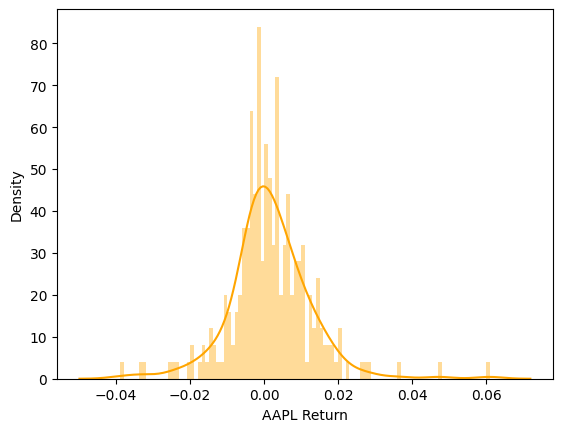

In [16]:
sns.distplot(returns.loc['2017-01-01':'2017-12-31']['AAPL Return'],color='orange',bins=100)

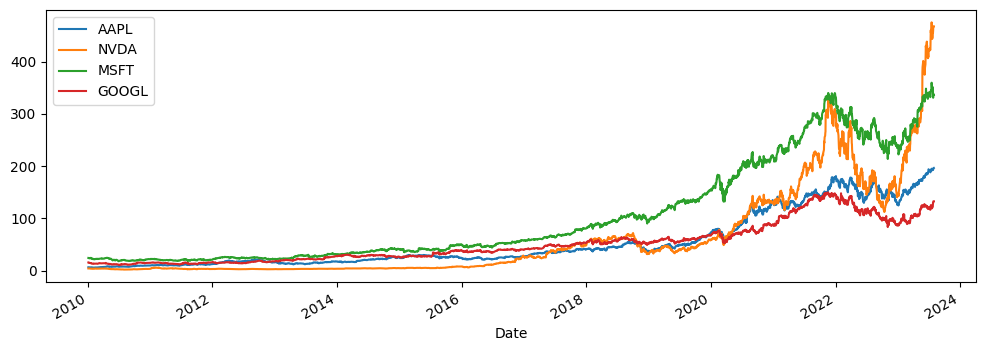

In [17]:
for tick in tickers:
    tech_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [18]:
tech_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\3412603579.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\3412603579.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



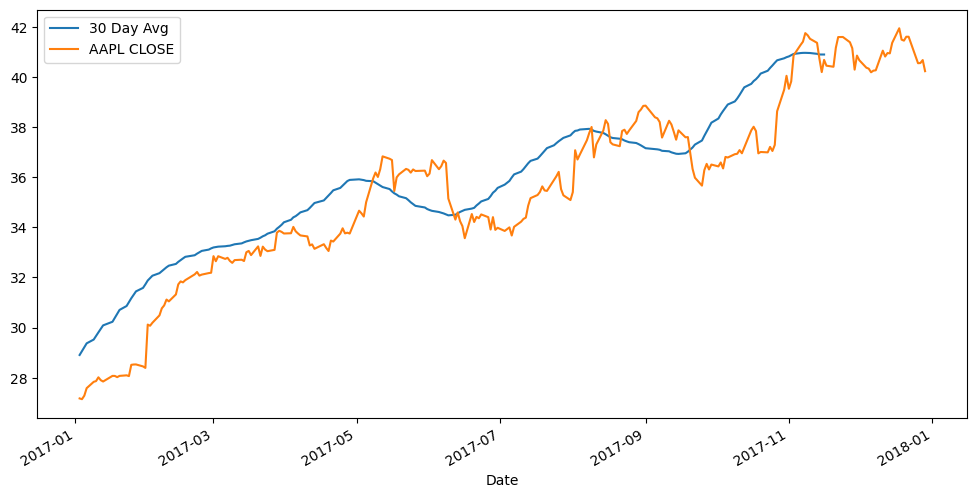

In [19]:
plt.figure(figsize=(12,6))
AAPL['Close'].loc['2017-01-01':'2018-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
AAPL['Close'].loc['2017-01-01':'2018-01-01'].plot(label='AAPL CLOSE')
plt.legend()

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\2301321850.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\2301321850.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



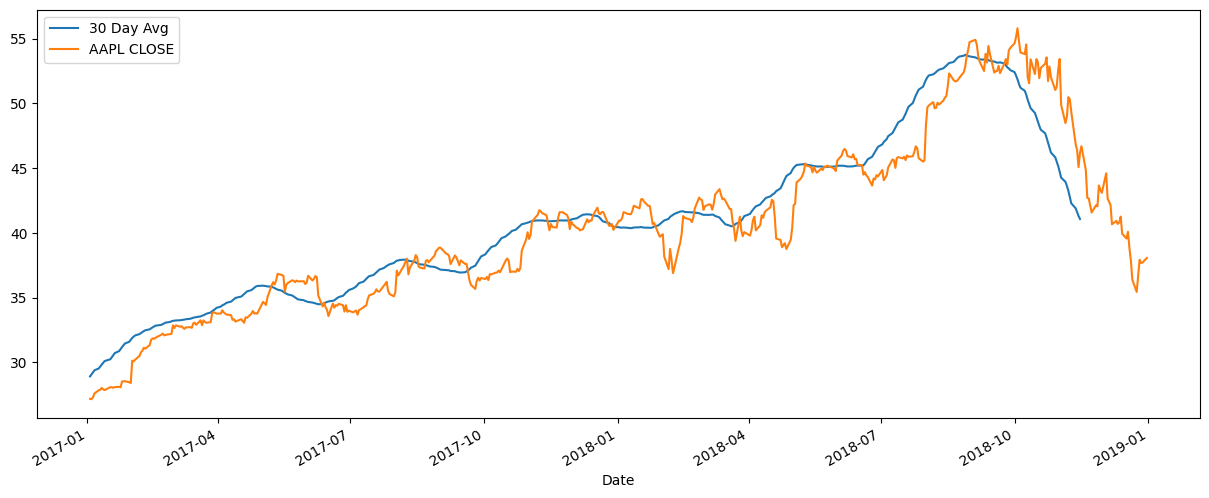

In [20]:
plt.figure(figsize=(15,6))
AAPL['Close'].loc['2017-01-01':'2019-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
AAPL['Close'].loc['2017-01-01':'2019-01-01'].plot(label='AAPL CLOSE')
plt.legend()

In [21]:
AAPL[['Open', 'High', 'Low', 'Close']].loc['2017-01-01':'2017-07-01'].iplot(kind='candle')

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\3988502845.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [30]:
MSFT['Close'].loc['2017-01-01':'2018-01-01'].ta_plot(study='sma',periods=[13],title='Simple Moving Averages')

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\3155010479.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [23]:
MSFT['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='rsi',periods=[30],title='RSI')

C:\Users\Theodore\AppData\Local\Temp\ipykernel_9612\799101967.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

